In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.cost1_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)   ### MSE
            cost1 = np.sum(np.abs(residuals)) / m        ### MAE
            self.cost_.append(cost)
            self.cost1_.append(cost1)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)


def scatter_plot(x, y, size=10, x_label='x', y_label='y', color='b'):
    plt.scatter(x, y, s=size, color=color)
    set_labels(x_label, y_label)


def plot(x, y, x_label='x', y_label='y', color='r'):
    plt.plot(x, y, color=color)
    set_labels(x_label, y_label)


def ploty(y, x_label='x', y_label='y'):
    plt.plot(y)
    set_labels(x_label, y_label)


def set_labels(x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [ ]:
def MAE(predict,target):
    return (abs(predict-target)).mean()

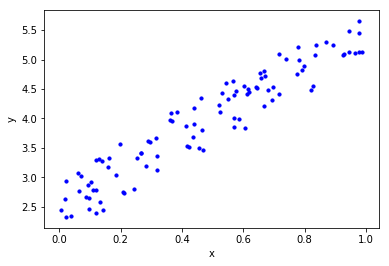

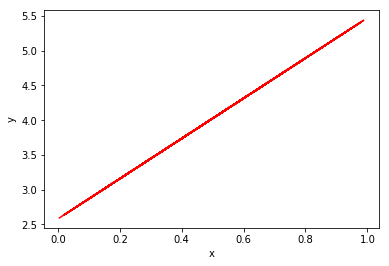

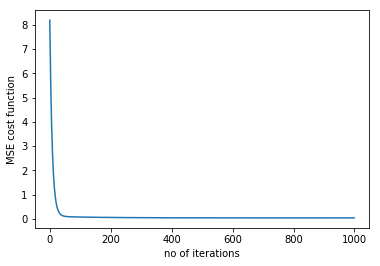

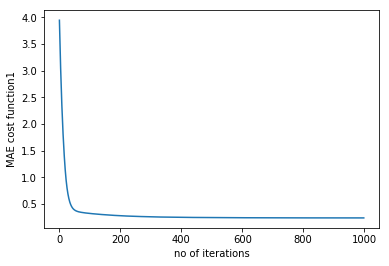

The coefficient is [2.89114079]
The intercept is [2.58109277]


In [43]:
def generate_data_set():
    """ Generates Random Data
    Returns
    -------
    x : array-like, shape = [n_samples, n_features]
            Training samples
    y : array-like, shape = [n_samples, n_target_values]
            Target values
    """
    np.random.seed(0)
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    return x, y


if __name__ == "__main__":
    # initializing the model
    linear_regression_model = LinearRegressionUsingGD()

    # generate the data set
    x, y = generate_data_set()

    # transform the feature vectors to include the bias term
    # adding 1 to all the instances of the training set.
    m = x.shape[0]
    x_train = np.c_[np.ones((m, 1)), x]

    # fit/train the model
    linear_regression_model.fit(x_train, y)

    # predict values
    predicted_values = linear_regression_model.predict(x_train)

    # model parameters
    intercept, coeffs = linear_regression_model.w_

    # cost_function
    cost_function = linear_regression_model.cost_
    cost_function1 = linear_regression_model.cost1_

    # plotting
    scatter_plot(x, y)
    plot(x, predicted_values)
    ploty(cost_function, 'no of iterations', 'MSE cost function')
    ploty(cost_function1, 'no of iterations', 'MAE cost function1')

    print('The coefficient is {}'.format(coeffs))
    print('The intercept is {}'.format(intercept))